<a href="https://colab.research.google.com/github/leonardoLavagna/Drug-repurposing/blob/main/SimoneVersione2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

Before anything else remeber to:


1.   When using Google Colab collect all the needed files inside the folder BI-Data in your Google Drive.
2.   When using colab upload the auxiliary functions in the 'content' directory.



In [1]:
# ASSIGN colab = True WHEN USING GOOGLE COLAB

import os
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    os.chdir('/content/drive/MyDrive/BI-Data/')

Mounted at /content/drive


In [2]:
!git clone https://github.com/dinaghiassian/DIAMOnD DiaBLE
!git clone https://github.com/dinaghiassian/DIAMOnD

fatal: destination path 'DiaBLE' already exists and is not an empty directory.
fatal: destination path 'DIAMOnD' already exists and is not an empty directory.


In [3]:
#https://github.com/GuyAllard/markov_clustering
%pip install markov_clustering 
%pip install networkx --upgrade
%pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# DIRECTORY TREE
# Change according to your file system
# This path should be the same used in the auxiliary_funtions module
# Remark . When using Google Colab remember that the path has been changed to 
# /content/drive/MyDrive/BI-Data/ 

path = './'

### Libraries

In [5]:
import re
import csv
import random
import json
import ast
import sys
import statistics
import auxiliary_functions as AF
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import markov_clustering as mc
from tqdm import tqdm
from scipy.stats import hypergeom
from sklearn.model_selection import train_test_split

In [6]:
!ls

 auxiliary_functions.py
 BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt
 cross_0.txt
 cross_1.txt
 cross_2.txt
 cross_3.txt
 cross_4.txt
 curated_gene_disease_associations.tsv
 DiaBLE
 DiaBLE_results
 DIAMOnD
 DIAMOnD.py
 DIAMOnD_results
 file_name
 first_200_added_nodes_weight_1_Key0.txt
'Hypertensive disease_seed_gene.txt'
'Hypertensive disease_splits.json'
 local_measures.csv
 new_name.txt
 PPI.adjlist
 PPI_Hypertensive.txt
 PPI_Libman.txt
 probeset_0.txt
 probeset_1.txt
 probeset_2.txt
 probeset_3.txt
 probeset_4.txt
 __pycache__
 res0.txt
 seed_genes.txt
 seed_gene.txt
 splits.json


## TASK 1 . PPI and GDA data gathering and interactome reconstruction

### Data gathering and interactome reconstruction

In [7]:
# DATA GATHERING AND PROCESSING

HSN = AF.interactome_processing(path+"BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt")
DGA_all = pd.read_csv(path+'curated_gene_disease_associations.tsv',sep='\t')
DGA =  DGA_all[DGA_all['diseaseName'] == 'Hypertensive disease']
DGA = AF.DGA_processing(path+'curated_gene_disease_associations.tsv', 'Hypertensive disease') 
#DG_in_PPI,splits = AF.make_seeds_splits(DGA,HSN,'Hypertensive disease',path)
DG_in_PPI, splits = AF.import_seeds_split('Hypertensive disease')

Processing interactome...


<ipython-input-7-876a84ed4143>:3: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  HSN = AF.interactome_processing(path+"BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt")


# Process completed.
Creating seed gene splits...
Number of genes in disease PPI:  290
# Process completed.
Importing seed genes...
# Process completed.


### Compute the disease LCC and its basic network measures

In [8]:
# LCC COMPUTATION

LCC = AF.extract_LCC_form_PPI(HSN)
n_nodes = LCC.number_of_nodes()

Extracting LCC...
Nodes  19618 , Connections  665061
# Process completed.


Creating Disease LCC graph...
Nodes in disease LCC  232
# Process completed.


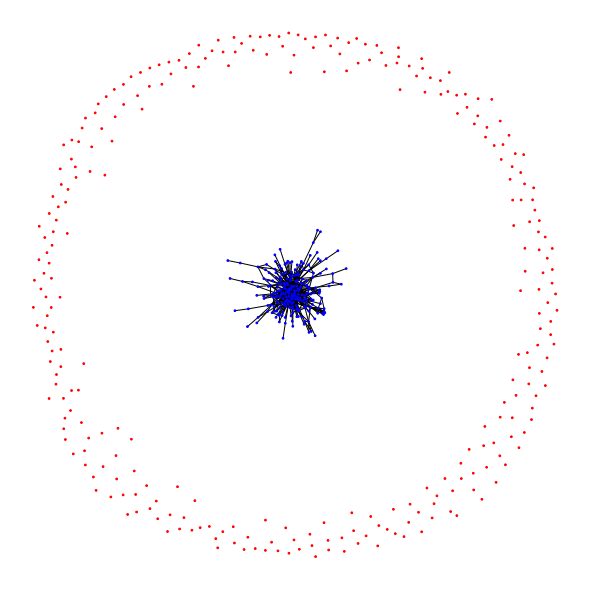

In [9]:
# LCC PLOT

DN = AF.make_disease_graph(HSN, DGA, DG_in_PPI)
AF.plot_LCC(DN, DG_in_PPI)

## Task 2 . Putative disease genes identification algorithms

### DIAMOnD algorithm

In [10]:
# SET UP

#dict with pair k,v where k is the index and v is the list of genes in the probe set
with open(path+'Hypertensive disease_splits.json') as f:
  dict_ = json.load(f)

with open(path+'Hypertensive disease_seed_gene.txt') as f:
  data = f.read()
  seeds = ast.literal_eval(data)
  seeds = np.asarray(seeds)

dict_.items()
type(dict_)
print(len(dict_["0"]))

58


In [11]:
# CROSS VALIDATION SPLITS INTO FILES

# 58 is the probe set v
# 290-58 has to be the training set l
for k,v in dict_.items():
    print(k,v)

    with open(path+'probeset_{}.txt'.format(k),'w') as f:
        for item in v:
            f.write("%s," % item)   

    l=list(set(seeds).difference(set(v))) #l is 232, it seems right!
    print("len of l",len(l))
 
    with open(path+'cross_{}.txt'.format(k),'w') as f:
        for item in l:
            f.write("%s\n" % item)
    

0 ['SDCCAG8', 'LYZ', 'OFD1', 'INPPL1', 'TGM2', 'AOC3', 'CYP11B1', 'ADIPOQ', 'USP8', 'KCNMB1', 'NPHP1', 'COX3', 'CCL2', 'ADCY5', 'CYBA', 'HSD11B2', 'CYP21A2', 'CYP17A1', 'EDN3', 'GCG', 'SMAD3', 'ADRA2A', 'SH2B3', 'ELN', 'F12', 'NOS2', 'OXT', 'IGF1', 'DUSP5', 'LOX', 'TNF', 'CYBB', 'TP53', 'ABCC1', 'SOD2', 'SLC12A2', 'TRPC3', 'SCNN1G', 'GJA5', 'CXCL2', 'MDH1', 'COX1', 'PRKAR1A', 'KLK1', 'WNK4', 'EPO', 'AR', 'TGFBR2', 'FN1', 'BBS9', 'LEPR', 'VAV3', 'RELA', 'CACNA2D1', 'IL1B', 'WDPCP', 'ICAM1', 'RGS5']
len of l 232
1 ['DYRK1B', 'MMP9', 'GSTT1', 'LDLR', 'AGT', 'OLR1', 'PLIN1', 'ACTA2', 'PDE8B', 'AIP', 'CACNA1D', 'COX2', 'NPTN', 'KNG1', 'MKS1', 'FGA', 'TGFB1', 'RALBP1', 'CD2AP', 'FXYD2', 'ORAI1', 'CYP1A1', 'ATP2B3', 'PAX2', 'F11', 'APOB', 'DRD2', 'MUC1', 'GJC1', 'ACE', 'CYTB', 'IFT27', 'LTF', 'NOS3', 'SOD1', 'TRH', 'COL4A4', 'NEDD4L', 'NPPB', 'ADD1', 'RPS6KB1', 'JUN', 'IKBKAP', 'NCF1', 'REN', 'PTGS2', 'WNK1', 'ECE1', 'HTR2B', 'TIMP1', 'NME1', 'COL4A3', 'ALOX15', 'TRIM32', 'GLP1R', 'HMOX1', 'I

### Validation

Now we are going to test the model, therefore we extract the training set and see how many nodes we retrieve of the probe set using a 5 cross validation

#### Evaluation of performances

In [58]:

def evaluation(top_n, cval, alg_name,k):
    recalls, precs, f1s, ndcg_scores = ([] for _ in range(4))

    cv = pd.read_csv('res{}.txt'.format(k),sep='\t')
    cv_nodes = cv[alg_name + '_node'].tolist()

    
    with open(path+'probeset_{}.txt'.format(k)) as f:
          probeset = f.read().split(",")
          probeset=set(probeset)
          probeset.remove("")  

    # Subsetting
    top = set(cv_nodes[0:top_n]) 
    
    # Intersecting with the probe set  
    inters = top.intersection(probeset) 
    print(inters)

    # Appending the results
    recall = round(len(inters)/cval, 3)
    prec = round(len(inters)/top_n, 3)
    recalls.append(recall)
    precs.append(prec)

    try:
      f1s.append(round(2*((recall*prec)/(recall+prec)), 3))
    except:
      f1s.append(0)

    return {'recall': recalls, 
            'precision': precs, 
            'F1 Score': f1s, }

In [59]:
alg_name = "DIAMOnD"
tot = 200
!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_0.txt  200 "res0.txt"
m = evaluation(tot, 58, alg_name,0)
print(m)

!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_1.txt  200 "res1.txt"
m = evaluation(tot, 58, alg_name,1)
print(m)

!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_2.txt  200 "res2.txt"
m = evaluation(tot, 58, alg_name,2)  
print(m)


!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_3.txt  200 "res3.txt"
m = evaluation(tot, 58, alg_name,3)  
print(m)


!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_4.txt  200 "res4.txt"
m = evaluation(tot, 58, alg_name,4)  
print(m)

Traceback (most recent call last):
  File "DIAMOnD.py", line 448, in <module>
    G_original, seed_genes = read_input(network_edgelist_file, seeds_file)
  File "DIAMOnD.py", line 126, in read_input
    node2 = line_data[1]
IndexError: list index out of range
{'AR', 'TP53', 'RELA', 'WNK4', 'SMAD3'}
{'recall': [0.086], 'precision': [0.025], 'F1 Score': [0.039]}
Traceback (most recent call last):
  File "DIAMOnD.py", line 448, in <module>
    G_original, seed_genes = read_input(network_edgelist_file, seeds_file)
  File "DIAMOnD.py", line 126, in read_input
    node2 = line_data[1]
IndexError: list index out of range
{'JUN'}
{'recall': [0.017], 'precision': [0.005], 'F1 Score': [0.008]}
Traceback (most recent call last):
  File "DIAMOnD.py", line 448, in <module>
    G_original, seed_genes = read_input(network_edgelist_file, seeds_file)
  File "DIAMOnD.py", line 126, in read_input
    node2 = line_data[1]
IndexError: list index out of range
{'JAK2'}
{'recall': [0.017], 'precision': [0.005]

### Check

In [17]:
curated_gene_desease_association_DF = pd.read_csv("curated_gene_disease_associations.tsv", sep = '\t', compression = 'infer')
disease_DF = curated_gene_desease_association_DF.loc[curated_gene_desease_association_DF['diseaseId'] == 'C0020538']
print('Number of detected genes involved in the desease: ', len(disease_DF))
disease_DF.head(5)

Number of detected genes involved in the desease:  303


,geneId,geneSymbol,diseaseId,diseaseName,score,NofPmids,NofSnps,source
479,10019,SH2B3,C0020538,Hypertensive disease,0.203231,0,0,HPO
850,10052,GJC1,C0020538,Hypertensive disease,0.200000,1,0,CTD_human
874,10058,ABCB6,C0020538,Hypertensive disease,0.200000,0,0,HPO
2452,10269,ZMPSTE24,C0020538,Hypertensive disease,0.200000,0,0,HPO
3619,10451,VAV3,C0020538,Hypertensive disease,0.200275,1,0,CTD_human


In [19]:
print("List of gene symbols:\n", *list(disease_DF['geneSymbol']))
seed_genes_symbols = list(disease_DF['geneSymbol'])

List of gene symbols:
 SH2B3 GJC1 ABCB6 ZMPSTE24 VAV3 CETP SDCCAG8 UTS2 RALBP1 IFT27 ADCY5 HRH3 ERCC8 ADD1 CLCNKA CMA1 COL1A1 COL3A1 COL4A3 COL4A4 COL4A5 CPOX CRHR2 CRP CTGF ADRA2A ADRB1 CYBA CYBB CYP1A1 GRK2 CYP11B1 CYP11B2 CYP17A1 CYP21A2 ACE DRD2 AGT DUSP5 AGTR1 AGTR2 ECE1 EDN1 EDN3 EDNRA EGFR AHR ELN EPO ERCC4 ERCC6 ALAD ALB F11 F12 FBN1 GSTA5 FGA FGFR2 CEP164 FOXF1 TRIM32 FOXE3 FMO3 NEDD4L FN1 FOS CD2AP ALOX15 MTOR G6PC SLC37A4 AOC1 LDLRAP1 TRAF3IP1 IFT172 KLHL3 GCG GCH1 GJA1 GJA4 GJA5 NPTN NPHP3 INVS GLA BBS9 GCLC STK39 GLP1R GNAS GNB3 GNRH1 GP1BA GPX1 NR3C1 CXCL2 GSK3B GSTT1 GSTT2 GUCY1A3 ANXA1 HIF1A HMBS HMOX1 HP HSD11B1 HSD11B2 APOA1 HTR2B APOB ICAM1 IDUA IGF1 APOE SLC6A18 IL1B IL6 AQP1 INS INPPL1 AR JAK2 JUN KCNJ1 KCNJ5 KCNMB1 KLK1 KNG1 ACT LDLR LEP LEPR LHB LMNA LOX LPL LTF LYZ SMAD3 SMAD4 MC2R MDH1 NR3C2 MMP2 MMP9 ABCC1 TRNC COX1 COX2 COX3 CYTB ND1 ND5 ND6 TRNE TRNF TRNK TRNL1 TRNQ TRNS1 TRNS2 TRNV TRNW MUC1 MYD88 MYH9 MYH11 MYLK ATOX1 ATP1A1 NF1 ATP1A2 NME1 NOS2 NOS3 FXYD2

In [55]:
len(set(list(LCC.nodes())).intersection(set(seed_genes_symbols)))

290